In [19]:
import pandas as pd
import numpy as np 

In [20]:
df = pd.read_excel('default_of_credit_card_clients.xls')

In [21]:
df.shape

(30000, 25)

Our dataset have 30000 rows and 25 columns. That is 30000 samples in 25 columns.

In [26]:
df.columns.tolist()

['ID',
 'LIMIT_BAL',
 'SEX',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_1',
 'PAY_2',
 'PAY_3',
 'PAY_4',
 'PAY_5',
 'PAY_6',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6',
 'default payment next month']

Lets check for any duplicate entries in our dataset and remove it. For that we will check the ID column.

In [29]:
df['ID'].value_counts().max()

2

We can see that some samples are occuring twice with same ID value.

In [35]:
id_counts = df['ID'].value_counts()
dupe_mask = id_counts == 2
dupe_mask[0:5]

590a776e-5049    True
98395d08-9643    True
91321f74-e4a4    True
97f74dea-338e    True
8567249b-827e    True
Name: ID, dtype: bool

In [38]:
dupe_ids = id_counts.index[dupe_mask]
dupe_ids = list(dupe_ids)
len(dupe_ids)

313

In [44]:
df.loc[df['ID'].isin(dupe_ids[0:3]),:]

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1070,98395d08-9643,230000,1,1,1,61,-1,-1,-1,-1,...,4932,2783,7411,3710,2266,7338,2791,7433,4527,0
1170,98395d08-9643,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10171,590a776e-5049,70000,2,2,2,40,0,0,0,0,...,27430,25498,27678,3141,7000,5505,3000,4000,5000,0
10271,590a776e-5049,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15190,91321f74-e4a4,30000,2,2,2,24,3,2,2,7,...,300,300,300,0,0,0,0,0,0,0
15290,91321f74-e4a4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
df_zero_mask = df == 0


In [71]:
feature_zero_mask = df_zero_mask.iloc[:,1:].all(axis=1)
sum(feature_zero_mask)


315

In [53]:
df_clean_1 = df.loc[~feature_zero_mask,:].copy()


In [54]:
df_clean_1['ID'].nunique()


29685

In [56]:
valid_pay_1_mask = df_clean_1['PAY_1'] != 'Not available'
valid_pay_1_mask[0:5]

0    True
1    True
2    True
3    True
4    True
Name: PAY_1, dtype: bool

In [57]:
df_clean_2 = df_clean_1.loc[valid_pay_1_mask,:].copy()


In [58]:
df_clean_2['PAY_1'] = df_clean_2['PAY_1'].astype('int64')
df_clean_2[['PAY_1', 'PAY_2']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26664 entries, 0 to 29999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   PAY_1   26664 non-null  int64
 1   PAY_2   26664 non-null  int64
dtypes: int64(2)
memory usage: 624.9 KB


In [75]:
df_clean_1.shape

(29685, 25)

In [68]:
df_with_ohe.shape

(26664, 30)

## Data Exploration

In [76]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl
#mpl.rcParams['figure.dpi'] = 400 #high resolution figures

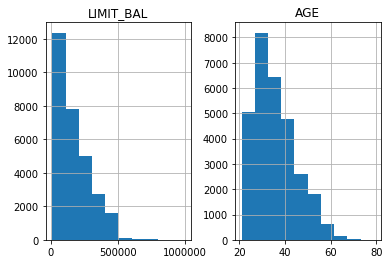

In [88]:
df_clean_1[['LIMIT_BAL', 'AGE']].hist();

In [87]:
df_clean_1[['LIMIT_BAL', 'AGE']].describe()

,LIMIT_BAL,AGE
count,29685.000000,29685.000000
mean,167519.948796,35.481354
std,129716.478534,9.212199
min,10000.000000,21.000000
25%,50000.000000,28.000000
50%,140000.000000,34.000000
75%,240000.000000,41.000000
max,1000000.000000,79.000000


In [86]:
df_clean_1['EDUCATION'].value_counts().sort_index()

0       14
1    10474
2    13884
3     4867
4      122
5      275
6       49
Name: EDUCATION, dtype: int64

We are provided with only 4 categories : 1=graduate school; 2=university; 3=high school; 4=others. 

We will add the category 0,5 and 6 to the category others.

In [89]:
df_clean_1['EDUCATION'].replace(to_replace=[0, 5, 6], value=4, inplace=True)
df_clean_1['EDUCATION'].value_counts()

2    13884
1    10474
3     4867
4      460
Name: EDUCATION, dtype: int64

In [91]:
df_clean_1['MARRIAGE'].value_counts().sort_index()

0       54
1    13503
2    15810
3      318
Name: MARRIAGE, dtype: int64

Here also we have one undocumented category. We will add that to others.

In [92]:
df_clean_1['MARRIAGE'].replace(to_replace=0, value=3, inplace=True)
df_clean_1['MARRIAGE'].value_counts()

2    15810
1    13503
3      372
Name: MARRIAGE, dtype: int64

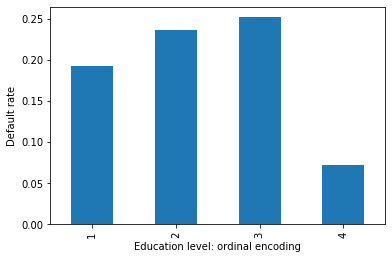

In [95]:
df_clean_1.groupby('EDUCATION').agg({'default payment next month':'mean'}).plot.bar(legend=False)
plt.ylabel('Default rate')
plt.xlabel('Education level: ordinal encoding');

One Hot Encoding

In [97]:
df_clean_2['EDUCATION_CAT'] = 'none'
df_clean_2[['EDUCATION', 'EDUCATION_CAT']].head(10)

,EDUCATION,EDUCATION_CAT
0,2,none
1,2,none
2,2,none
3,2,none
4,2,none
5,1,none
6,1,none
7,2,none
8,3,none
9,3,none


In [98]:
cat_mapping = {
    1: "graduate school",
    2: "university",
    3: "high school",
    4: "others"
}
df_clean_2['EDUCATION_CAT'] = df_clean_2['EDUCATION'].map(cat_mapping)
df_clean_2[['EDUCATION', 'EDUCATION_CAT']].head(10)

,EDUCATION,EDUCATION_CAT
0,2,university
1,2,university
2,2,university
3,2,university
4,2,university
5,1,graduate school
6,1,graduate school
7,2,university
8,3,high school
9,3,high school


In [99]:
edu_ohe = pd.get_dummies(df_clean_2['EDUCATION_CAT'])
edu_ohe.head(10)

,graduate school,high school,others,university
0,0,0,0,1
1,0,0,0,1
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1
5,1,0,0,0
6,1,0,0,0
7,0,0,0,1
8,0,1,0,0
9,0,1,0,0


In [100]:
df_with_ohe = pd.concat([df_clean_2, edu_ohe], axis=1)
df_with_ohe[['EDUCATION_CAT', 'graduate school',
             'high school', 'university', 'others']].head(10)

,EDUCATION_CAT,graduate school,high school,university,others
0,university,0,0,1,0
1,university,0,0,1,0
2,university,0,0,1,0
3,university,0,0,1,0
4,university,0,0,1,0
5,graduate school,1,0,0,0
6,graduate school,1,0,0,0
7,university,0,0,1,0
8,high school,0,1,0,0
9,high school,0,1,0,0


In [101]:
df_with_ohe.to_csv('cleaned_data.csv', index=False)

## Exploring the Financial History Features in the Dataset


In [105]:
df = pd.read_csv('cleaned_data.csv')
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month', 'EDUCATION_CAT', 'graduate school',
       'high school', 'others', 'university'],
      dtype='object')

In [103]:
pay_feats = ['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
df[pay_feats].describe()

,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
count,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000
mean,-0.017777,-0.133363,-0.167679,-0.225023,-0.269764,-0.293579
std,1.126769,1.198640,1.199165,1.167897,1.131735,1.150229
min,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000
25%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000


In [106]:
df[pay_feats[0]].value_counts().sort_index()

-2     2476
-1     5047
 0    13087
 1     3261
 2     2378
 3      292
 4       63
 5       23
 6       11
 7        9
 8       17
Name: PAY_1, dtype: int64

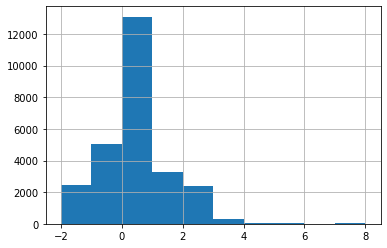

In [107]:
df[pay_feats[0]].hist();

In [108]:
pay_1_bins = np.array(range(-2,10)) - 0.5
pay_1_bins

array([-2.5, -1.5, -0.5,  0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,
        8.5])

Text(0, 0.5, 'Number of accounts')

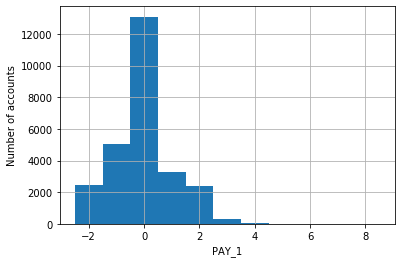

In [109]:
df[pay_feats[0]].hist(bins=pay_1_bins)
plt.xlabel('PAY_1')
plt.ylabel('Number of accounts')

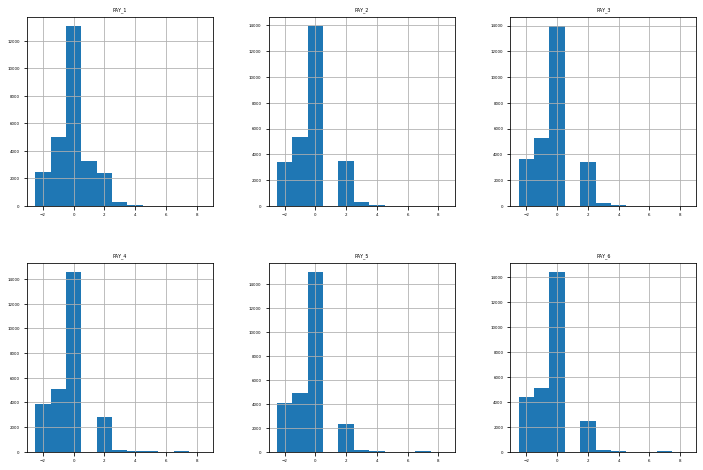

In [114]:
mpl.rcParams['font.size'] = 4
mpl.rcParams['figure.figsize'] = (12,8)
df[pay_feats].hist(bins=pay_1_bins, layout=(2,3));

In [115]:
df.loc[df['PAY_2']==2, ['PAY_2', 'PAY_3']].head()

,PAY_2,PAY_3
0,2,-1
1,2,0
13,2,2
15,2,0
47,2,2
